In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_excel("cf.xlsx", sheet_name="1516Students",converters={'HOMEZIP':str})

In [3]:
df.columns = ['zips','distance']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 2 columns):
zips        1309 non-null object
distance    924 non-null object
dtypes: object(2)
memory usage: 20.5+ KB


In [4]:
df.head(3)

,zips,distance
0,00902,1573
1,00921,1573
2,00966,1573


In [5]:
df2 = pd.read_excel("cf.xlsx", sheet_name = "1718Students",converters={'ZIP':str})

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1366 entries, 0 to 1365
Data columns (total 1 columns):
ZIP    1366 non-null object
dtypes: object(1)
memory usage: 10.8+ KB


In [7]:
df2.ZIP = df2.ZIP.astype(str)

In [8]:
df2['zips'] = df2['ZIP'].str.split('-').str.get(0)
df2.drop(['ZIP'], axis = 1, inplace = True)

In [9]:
df2.sort_values(by=['zips'], inplace = True)
df2.head(2)

,zips
1070,00824
0,00902


In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df2['zips'].value_counts())

21620    40
21146    14
21617    13
19709    13
21093    13
21601    11
21122    11
21784    10
21042    10
21204    10
21015     9
19707     8
21771     8
21921     8
21678     8
19064     8
21666     7
21120     7
21212     7
21136     7
21401     7
19977     6
08057     6
21228     6
19963     6
19808     6
21014     6
21661     6
20910     6
21286     6
21901     6
19348     6
21114     6
21811     5
19702     5
19901     5
19380     5
21108     5
19803     5
21035     5
21651     5
21804     5
21050     5
21037     5
21701     5
21043     5
19720     5
21131     5
19711     5
19938     5
08302     5
20735     5
20814     4
21613     4
19958     4
19956     4
21152     4
19734     4
08033     4
20902     4
19083     4
21111     4
21403     4
19086     4
21236     4
21012     4
20874     4
19382     4
19352     4
21409     4
20904     4
21234     4
21210     4
21113     3
20817     3
19038     3
19041     3
21619     3
19130     3
21001     3
19355     3
21635     3
21660     3
2107

In [11]:
df.drop_duplicates(subset ="zips", 
                     keep = 'first', inplace = True) 
df2.drop_duplicates(subset ="zips", 
                     keep = 'first', inplace = True)  

In [12]:
df3 = df2.merge(df, on = 'zips', how = 'left')
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 0 to 737
Data columns (total 2 columns):
zips        738 non-null object
distance    331 non-null object
dtypes: object(2)
memory usage: 17.3+ KB


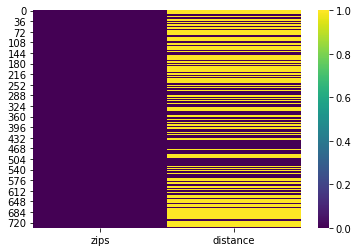

In [13]:
sns.heatmap(df3.isnull(), cmap = 'viridis')

In [14]:
#df3.to_excel('studentTandF18.xlsx', sheet_name = 'NewSheet') 